In [1]:

import torch
from torch import nn
from torch import optim

from torchsummary import summary
import imageVisualizationHelper 
from dilationNeuralNetwork import DilationNeuralNetwork
import commonHelper
import trainLoopHelper
import testLoopHelper
import datasetProvider

In [2]:
DATA_FOLDER = "../../data"
from torch.utils.data import Dataset
image_classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
device = commonHelper.get_device(use_seed=True)

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

---->TRAINING data with transform


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


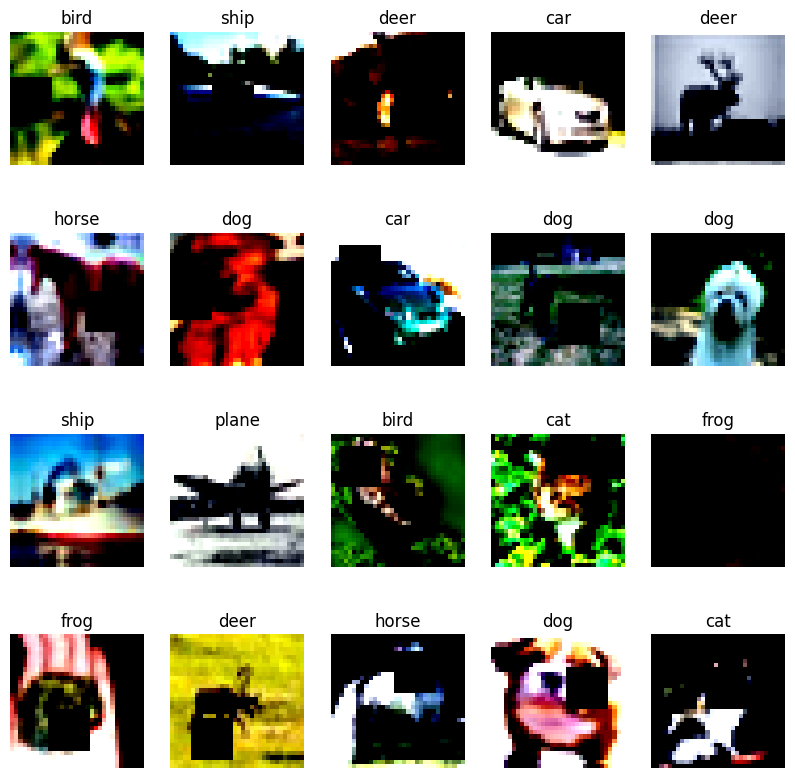

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

---->TEST data with transform


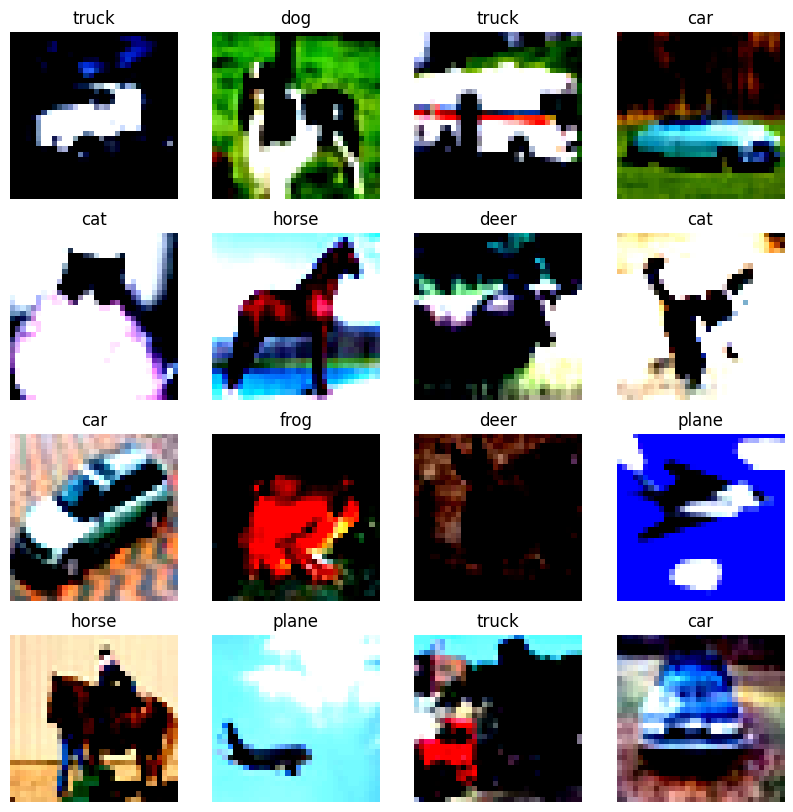

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


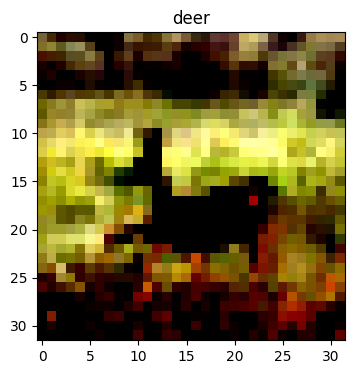

In [3]:

# Download training data from open datasets.

train_transforms_collection = []
train_transforms_collection.append(datasetProvider.create_flip_transformation(is_horizontal=True))
train_transforms_collection.append(datasetProvider.create_shift_scale_rotate_transform(shift_limit=0.1, scale_limit=0.1, rotate_limit=10))
train_transforms_collection.append(datasetProvider.create_random_crop_transformation(max_height=10, max_width=10, fill_value=[0,0,0]))
train_transforms_collection.extend(datasetProvider.create_basic_transforms_collection())

train_transforms = datasetProvider.compose_custom_transforms(train_transforms_collection)
test_transforms = datasetProvider.compose_custom_transforms(datasetProvider.create_basic_transforms_collection())

train_dataset, test_dataset = datasetProvider.get_CIFAR10_datasets(train_transforms_collection=train_transforms,
                                                                   test_transforms_collection=test_transforms,
                                                                    data_folder=DATA_FOLDER)

print("---->TRAINING data with transform")
imageVisualizationHelper.randomly_show_images_from_tensor_array(train_dataset, image_classes, rows=4, cols=5)


print("---->TEST data with transform")
imageVisualizationHelper.randomly_show_images_from_tensor_array(test_dataset, image_classes, rows=4, cols=4)

# Show single image
sample_idx = torch.randint(0, len(test_dataset), size=(1,))  
image_data, label = test_dataset[sample_idx.item()]
imageVisualizationHelper.show_image(image_data, image_classes[label])


In [4]:

BATCH_SIZE = 256
train_dataloader, test_dataloader = datasetProvider.get_dataloaders(train_dataset=train_dataset,
                                                                    test_dataset=test_dataset,
                                                                    batch_size=BATCH_SIZE)
                                                                    


Shape of test_dataloader batch_data [Batch, C, H, W]: torch.Size([256, 3, 32, 32])
Shape of test_dataloader label (label): torch.Size([256]) torch.int64
Labels for a batch of size 256 are tensor([6, 4, 0, 1, 5, 0, 3, 0, 9, 0, 0, 6, 7, 3, 7, 9, 7, 3, 3, 7, 2, 2, 7, 1,
        8, 1, 1, 0, 7, 0, 5, 3, 2, 9, 1, 3, 1, 3, 4, 8, 8, 6, 1, 5, 9, 1, 9, 7,
        2, 2, 3, 8, 1, 7, 5, 5, 7, 3, 5, 3, 9, 5, 4, 3, 6, 1, 9, 2, 1, 2, 2, 1,
        7, 2, 8, 2, 2, 6, 9, 0, 7, 2, 7, 3, 0, 5, 4, 3, 8, 5, 1, 8, 8, 6, 3, 1,
        0, 8, 4, 6, 8, 7, 4, 8, 0, 1, 3, 3, 8, 4, 7, 3, 7, 8, 3, 2, 5, 9, 8, 9,
        7, 1, 5, 6, 7, 4, 4, 0, 1, 7, 6, 6, 3, 7, 9, 3, 5, 0, 1, 7, 0, 6, 6, 4,
        5, 9, 2, 3, 4, 4, 7, 0, 5, 9, 2, 4, 8, 5, 6, 8, 4, 4, 0, 7, 2, 7, 3, 8,
        0, 5, 5, 1, 5, 0, 7, 0, 6, 3, 3, 5, 2, 2, 6, 2, 5, 3, 4, 4, 9, 6, 4, 4,
        2, 8, 7, 2, 6, 3, 7, 3, 3, 1, 6, 8, 6, 7, 1, 4, 9, 9, 9, 3, 9, 5, 0, 8,
        9, 6, 4, 7, 7, 5, 0, 0, 9, 6, 3, 5, 3, 3, 2, 6, 4, 1, 9, 4, 0, 4, 0, 8,
        4, 8

In [5]:
def get_model_instance(index=1, input_size=(3,32,32)) -> nn.Module:
    if(index <= 1 ):
        model = DilationNeuralNetwork(drop_out=0.1).to(device=device)
        summary(model=model, input_size=input_size)
        return model


model = get_model_instance(index=1)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 30, 30]           1,728
              ReLU-2           [-1, 64, 30, 30]               0
       BatchNorm2d-3           [-1, 64, 30, 30]             128
           Dropout-4           [-1, 64, 30, 30]               0
            Conv2d-5           [-1, 64, 30, 30]          36,864
              ReLU-6           [-1, 64, 30, 30]               0
       BatchNorm2d-7           [-1, 64, 30, 30]             128
           Dropout-8           [-1, 64, 30, 30]               0
            Conv2d-9           [-1, 64, 15, 15]          36,864
             ReLU-10           [-1, 64, 15, 15]               0
      BatchNorm2d-11           [-1, 64, 15, 15]             128
          Dropout-12           [-1, 64, 15, 15]               0
       BasicBlock-13           [-1, 64, 15, 15]               0
           Conv2d-14           [-1, 32,

In [6]:
def get_correct_prediction_count(predictions : torch.Tensor, valid_labels):
  # torch.argmax locates the indices of the maximum elements within a tensor.
  # It does this along a specified dimension (axis).
  return predictions.argmax(dim=1).eq(valid_labels).sum().item()

In [7]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []

train_accuracy = []
test_accuracy = []

MAX_IMAGES_FOR_DISPLAY = 20

correctly_predicted_trained_images = []
wrongly_predicted_trained_images = []

correctly_predicted_test_images = []
wrongly_predicted_test_images = []

In [8]:

def train_loop(dataloader, model, loss_fn, optimizer : optim.Optimizer):
    batch_train_accuracy, batch_train_losses, correctly_predicted_images, wrongly_predicted_images = trainLoopHelper.train_loop(dataloader, model, loss_fn, optimizer)
    train_accuracy.append(batch_train_accuracy)
    train_losses.append(batch_train_losses)

    if(len(correctly_predicted_trained_images) < MAX_IMAGES_FOR_DISPLAY):
        correctly_predicted_trained_images.extend(correctly_predicted_images)

    if(len(wrongly_predicted_trained_images) < MAX_IMAGES_FOR_DISPLAY):
        wrongly_predicted_trained_images.extend(wrongly_predicted_images)


In [9]:


def test_loop(dataloader, model, loss_fn):

        batch_test_accuracy, batch_test_losses, correctly_predicted_images, wrongly_predicted_images = testLoopHelper.test_loop(dataloader, model, loss_fn)
        test_accuracy.append(batch_test_accuracy)
        test_losses.append(batch_test_losses)

        if(len(correctly_predicted_test_images) < MAX_IMAGES_FOR_DISPLAY):
            correctly_predicted_test_images.extend(correctly_predicted_images)

        if(len(wrongly_predicted_test_images) < MAX_IMAGES_FOR_DISPLAY):
            wrongly_predicted_test_images.extend(wrongly_predicted_images)


In [10]:
LEARNING_RATE = 0.09
EPOCHS = 25
MOMENTUM = 0.85

correctly_predicted_trained_images = []
wrongly_predicted_trained_images = []
correctly_predicted_test_images = []
wrongly_predicted_test_images = []


loss_fn = nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=MOMENTUM, weight_decay=0)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.8, verbose=True)


for t in range(EPOCHS):
    print(f"Epoch {t+1}")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
    scheduler.step()

print("Done!")

c:\Users\1430647\Anaconda3\envs\cuda\lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch 1


Train: Loss=2.3332 Batch_id=0 Accuracy=7.81:   1%|          | 1/196 [00:19<1:04:48, 19.94s/it]

Train loop parameters shapes
 Shape of data : torch.Size([256, 3, 32, 32]), label: torch.Size([256])
Shape of predicted data : torch.Size([256, 10])
labels : tensor([4, 8, 2, 9, 1, 8, 7, 1, 5, 2, 9, 8, 2, 6, 0, 9, 6, 6, 9, 4, 5, 0, 0, 2,
        1, 3, 2, 0, 7, 8, 0, 3, 8, 5, 8, 0, 3, 0, 2, 0, 6, 9, 5, 1, 8, 6, 1, 3,
        3, 9, 9, 8, 6, 0, 4, 9, 2, 3, 8, 8, 6, 0, 0, 7, 2, 0, 1, 6, 8, 9, 1, 1,
        2, 6, 3, 8, 9, 9, 1, 4, 1, 7, 1, 0, 6, 0, 4, 9, 1, 8, 5, 5, 6, 8, 2, 6,
        0, 4, 4, 7, 1, 4, 0, 4, 7, 6, 7, 3, 3, 9, 2, 1, 9, 5, 4, 6, 1, 6, 2, 4,
        1, 9, 8, 8, 5, 3, 6, 2, 7, 8, 8, 4, 7, 5, 9, 7, 4, 7, 4, 4, 9, 1, 4, 7,
        3, 2, 5, 7, 6, 7, 0, 9, 7, 4, 0, 0, 0, 0, 3, 5, 8, 1, 6, 3, 1, 6, 8, 5,
        4, 0, 5, 7, 6, 8, 4, 0, 6, 0, 6, 6, 1, 3, 2, 6, 9, 9, 6, 5, 4, 9, 3, 0,
        2, 3, 1, 3, 5, 1, 4, 5, 2, 7, 3, 1, 8, 7, 2, 3, 9, 4, 5, 9, 1, 2, 3, 6,
        1, 6, 3, 4, 1, 1, 6, 1, 6, 8, 7, 5, 4, 3, 4, 4, 8, 1, 2, 9, 9, 2, 8, 3,
        5, 2, 7, 3, 7, 4, 5, 7, 0, 7, 2, 2

Train: Loss=1.5293 Batch_id=195 Accuracy=28.63: 100%|██████████| 196/196 [00:28<00:00,  6.94it/s]


Test loop parameters shapes
 Shape of data : torch.Size([256, 3, 32, 32]), label: torch.Size([256])
Shape of predicted data : torch.Size([256, 10])
labels : tensor([1, 8, 1, 0, 7, 1, 7, 2, 5, 8, 7, 0, 2, 7, 7, 3, 2, 9, 0, 7, 6, 5, 7, 9,
        4, 1, 1, 8, 2, 6, 4, 9, 5, 4, 3, 9, 2, 2, 1, 0, 8, 7, 5, 0, 6, 3, 3, 4,
        5, 4, 3, 2, 7, 3, 9, 5, 3, 7, 3, 1, 4, 5, 2, 7, 3, 5, 6, 4, 2, 5, 7, 2,
        8, 5, 4, 0, 9, 7, 6, 5, 4, 6, 3, 1, 8, 4, 2, 1, 2, 9, 4, 6, 5, 6, 8, 4,
        3, 9, 5, 0, 9, 1, 5, 9, 8, 1, 8, 9, 3, 7, 3, 0, 1, 4, 9, 2, 2, 4, 0, 4,
        4, 6, 9, 3, 7, 0, 3, 9, 1, 2, 9, 3, 3, 6, 7, 0, 7, 5, 4, 0, 4, 8, 9, 8,
        0, 6, 3, 5, 5, 9, 8, 8, 7, 8, 2, 6, 7, 4, 3, 0, 6, 9, 9, 7, 1, 3, 3, 0,
        3, 3, 2, 9, 7, 0, 4, 3, 9, 7, 5, 8, 8, 6, 4, 0, 2, 1, 7, 0, 8, 9, 8, 2,
        7, 7, 4, 7, 2, 1, 1, 6, 4, 6, 1, 0, 1, 5, 8, 9, 0, 2, 2, 4, 0, 2, 6, 1,
        1, 1, 4, 9, 8, 1, 2, 5, 4, 3, 6, 2, 1, 8, 4, 6, 0, 0, 5, 6, 4, 6, 2, 4,
        8, 1, 4, 4, 1, 2, 7, 3, 4, 8, 7, 3,

Train: Loss=1.4265 Batch_id=195 Accuracy=43.40: 100%|██████████| 196/196 [00:32<00:00,  6.08it/s]


Test set: Average loss: 64.8223, Accuracy: 4165/10000 (41.65%)

Epoch 3


Train: Loss=1.3267 Batch_id=195 Accuracy=51.04: 100%|██████████| 196/196 [00:30<00:00,  6.42it/s]


Test set: Average loss: 49.3939, Accuracy: 5581/10000 (55.81%)

Epoch 4


Train: Loss=1.2742 Batch_id=195 Accuracy=56.89: 100%|██████████| 196/196 [00:29<00:00,  6.64it/s]


Test set: Average loss: 43.3514, Accuracy: 6095/10000 (60.95%)

Epoch 5


Train: Loss=1.0293 Batch_id=195 Accuracy=60.74: 100%|██████████| 196/196 [00:32<00:00,  5.99it/s]


Test set: Average loss: 38.8542, Accuracy: 6552/10000 (65.52%)

Epoch 6


Train: Loss=0.8355 Batch_id=195 Accuracy=64.92: 100%|██████████| 196/196 [00:27<00:00,  7.07it/s]


Test set: Average loss: 35.0667, Accuracy: 6959/10000 (69.59%)

Epoch 7


Train: Loss=0.8638 Batch_id=195 Accuracy=67.69: 100%|██████████| 196/196 [00:27<00:00,  7.18it/s]


Test set: Average loss: 33.9421, Accuracy: 7111/10000 (71.11%)

Epoch 8


Train: Loss=0.9815 Batch_id=195 Accuracy=69.22: 100%|██████████| 196/196 [00:27<00:00,  7.03it/s]


Test set: Average loss: 29.1064, Accuracy: 7464/10000 (74.64%)

Epoch 9


Train: Loss=0.8701 Batch_id=195 Accuracy=71.11: 100%|██████████| 196/196 [00:27<00:00,  7.11it/s]


Test set: Average loss: 29.5318, Accuracy: 7511/10000 (75.11%)

Epoch 10


Train: Loss=0.6309 Batch_id=195 Accuracy=72.71: 100%|██████████| 196/196 [00:27<00:00,  7.08it/s]


Test set: Average loss: 29.0092, Accuracy: 7517/10000 (75.17%)

Epoch 11


Train: Loss=0.9697 Batch_id=195 Accuracy=74.49: 100%|██████████| 196/196 [00:27<00:00,  7.10it/s]


Test set: Average loss: 25.4447, Accuracy: 7849/10000 (78.49%)

Epoch 12


Train: Loss=0.6415 Batch_id=195 Accuracy=75.72: 100%|██████████| 196/196 [00:27<00:00,  7.09it/s]


Test set: Average loss: 25.6680, Accuracy: 7859/10000 (78.59%)

Epoch 13


Train: Loss=0.7702 Batch_id=195 Accuracy=76.12: 100%|██████████| 196/196 [00:27<00:00,  7.02it/s]


Test set: Average loss: 24.9947, Accuracy: 7847/10000 (78.47%)

Epoch 14


Train: Loss=0.7719 Batch_id=195 Accuracy=76.91: 100%|██████████| 196/196 [00:27<00:00,  7.10it/s]


Test set: Average loss: 23.6325, Accuracy: 7956/10000 (79.56%)

Epoch 15


Train: Loss=0.5207 Batch_id=195 Accuracy=77.57: 100%|██████████| 196/196 [00:27<00:00,  7.09it/s]


Test set: Average loss: 23.6624, Accuracy: 7992/10000 (79.92%)

Epoch 16


Train: Loss=0.6172 Batch_id=195 Accuracy=78.95: 100%|██████████| 196/196 [00:27<00:00,  7.10it/s]


Test set: Average loss: 21.5969, Accuracy: 8199/10000 (81.99%)

Epoch 17


Train: Loss=0.6429 Batch_id=195 Accuracy=79.36: 100%|██████████| 196/196 [00:30<00:00,  6.47it/s]


Test set: Average loss: 21.3956, Accuracy: 8200/10000 (82.00%)

Epoch 18


Train: Loss=0.6464 Batch_id=195 Accuracy=79.45: 100%|██████████| 196/196 [00:27<00:00,  7.01it/s]


Test set: Average loss: 20.8187, Accuracy: 8268/10000 (82.68%)

Epoch 19


Train: Loss=0.7216 Batch_id=195 Accuracy=80.04: 100%|██████████| 196/196 [00:27<00:00,  7.08it/s]


Test set: Average loss: 21.5795, Accuracy: 8217/10000 (82.17%)

Epoch 20


Train: Loss=0.4882 Batch_id=195 Accuracy=80.36: 100%|██████████| 196/196 [00:27<00:00,  7.11it/s]


Test set: Average loss: 20.4667, Accuracy: 8348/10000 (83.48%)

Epoch 21


Train: Loss=0.5524 Batch_id=195 Accuracy=81.25: 100%|██████████| 196/196 [00:27<00:00,  7.07it/s]


Test set: Average loss: 19.5516, Accuracy: 8370/10000 (83.70%)

Epoch 22


Train: Loss=0.5533 Batch_id=195 Accuracy=81.30: 100%|██████████| 196/196 [00:27<00:00,  7.02it/s]


Test set: Average loss: 18.7923, Accuracy: 8435/10000 (84.35%)

Epoch 23


Train: Loss=0.6007 Batch_id=195 Accuracy=81.75: 100%|██████████| 196/196 [00:28<00:00,  6.92it/s]


Test set: Average loss: 19.1931, Accuracy: 8413/10000 (84.13%)

Epoch 24


Train: Loss=0.4239 Batch_id=195 Accuracy=82.07: 100%|██████████| 196/196 [00:28<00:00,  6.89it/s]


Test set: Average loss: 19.2435, Accuracy: 8393/10000 (83.93%)

Epoch 25


Train: Loss=0.7440 Batch_id=195 Accuracy=82.39: 100%|██████████| 196/196 [00:27<00:00,  7.09it/s]


Test set: Average loss: 18.5270, Accuracy: 8438/10000 (84.38%)

Done!


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

----****----Wrongly predicted test images: 20


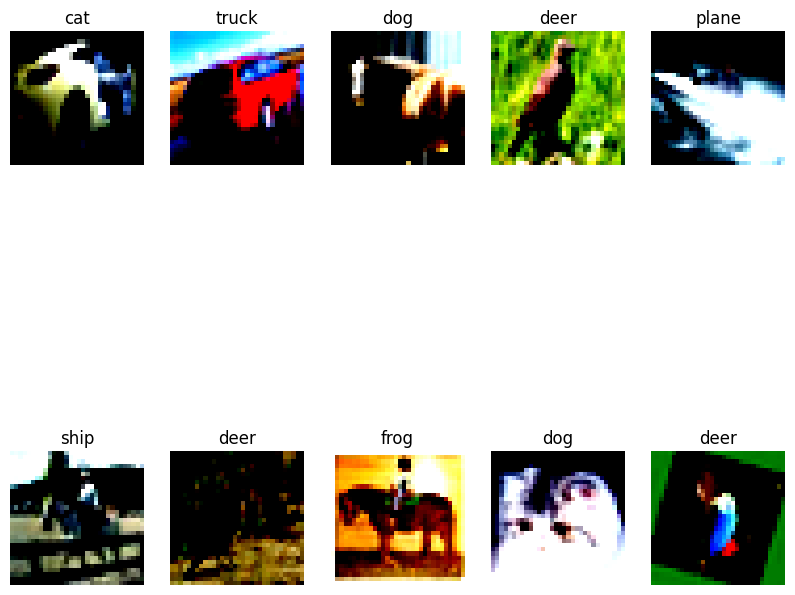

In [11]:

print(f"----****----Wrongly predicted test images: {len(wrongly_predicted_test_images)}")
imageVisualizationHelper.show_images_from_tensor_array(wrongly_predicted_test_images, image_classes, rows=2, cols=5)

# print(f"----****----Correctly predicted test images: {len(correctly_predicted_test_images)}")
# imageVisualizationHelper.show_images_from_tensor_array(correctly_predicted_test_images, image_classes, rows=2, cols=5)


# print(f"----****----Wrongly predicted train images: {len(wrongly_predicted_trained_images)}")
# imageVisualizationHelper.show_images_from_tensor_array(wrongly_predicted_trained_images, image_classes, rows=2, cols=5)

# print(f"----****----Correctly predicted train images: {len(correctly_predicted_trained_images)}")
# imageVisualizationHelper.show_images_from_tensor_array(correctly_predicted_trained_images, image_classes, rows=2, cols=5)
